In [4]:
import sys
sys.path.append('/Users/vdk/GeneveWork/Code/calibpipe-main-calibpipe/')
from astropy.io import ascii
import numpy as np
import pandas as pd
import matplotlib
import csv
import scipy
import matplotlib.pyplot as plt
from seaborn import histplot
import random
import copy
from os import path, makedirs
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u
from ctapipe.containers import MuonEfficiencyContainer
from ctapipe.coordinates import CameraFrame, TelescopeFrame
from ctapipe.io import EventSource, EventSeeker
from ctapipe.core import TelescopeComponent
from ctapipe.core.traits import (
    List,
    Int,
    FloatTelescopeParameter,
    TelescopeParameter,
    Unicode,
)
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.muon import MuonRingFitter, MuonIntensityFitter
from traitlets.config import Config
from ctapipe.image import ImageProcessor
from ctapipe.image.muon import MuonProcessor
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from ctapipe.calib import CameraCalibrator
from traitlets.config.loader import Config, FileConfigLoader, JSONFileConfigLoader
import pathlib
from calibpipe.throughput import MuonCalibrator
from traitlets.config import Config
from astropy.time import Time
from astropy.coordinates import EarthLocation,SkyCoord, AltAz 
from traitlets.config import Config
import time
from ctapipe.image import number_of_island_sizes
from ctapipe.image import (
    hillas_parameters,
    leakage_parameters,
    concentration_parameters,
)
from ctapipe.image import timing_parameters
from ctapipe.image import number_of_islands
from ctapipe.image import camera_to_shower_coordinates






In [1]:
from lstchain import mc

In [31]:
bins, y = mc.power_law_integrated_distribution(10, 100000, 100000, -2.7)


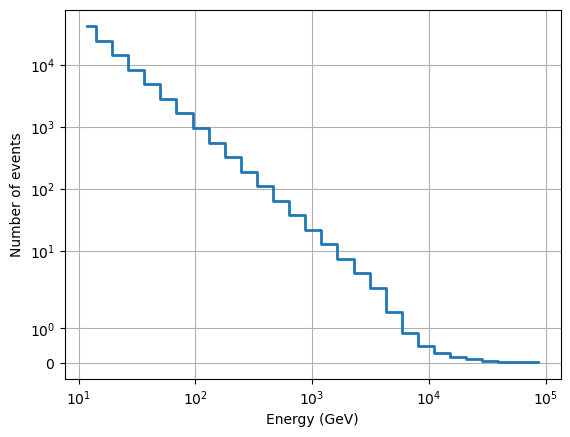

In [32]:
e_mean = (bins[:-1] + bins[1:])/2
plt.yscale('symlog')
plt.xscale('symlog')
plt.ylabel("Number of events")
plt.xlabel("Energy (GeV)")
plt.step(e_mean, y, where='mid', 
         linewidth=2,
         label='Histogram computed from mc info'
        )
plt.grid()

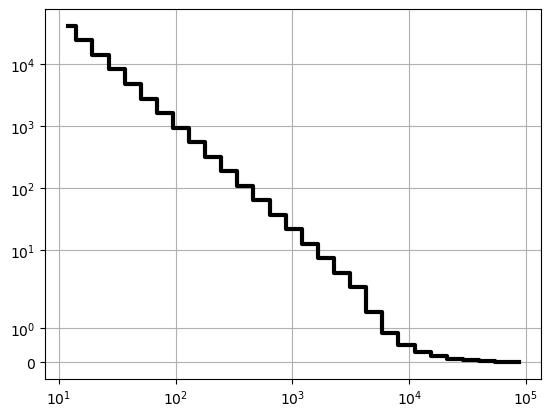

In [33]:
e_mean = (bins[:-1] + bins[1:])/2
plt.yscale('symlog')
plt.xscale('symlog')
plt.step(e_mean, y, where='mid', 
         linewidth=3,
         color='black',
         label='Histogram computed from mc info'
        )
plt.grid()

In [3]:
filename = '/Users/vdk/Downloads/Dummy100.simtel.gz'
source = EventSource(filename, max_events=9000)
event_iterator = iter(source)

TraitError: input_url /Users/vdk/Downloads/Dummy100.simtel.gz is not an existing file  and no EventSource implementation claimed compatibility

In [4]:
energies = np.logspace(1,6,100)

def func(e):
    return e**(-2)

In [5]:
n = [func(i) for i in energies]

In [6]:
x_vals[4]-x_vals[3]

NameError: name 'x_vals' is not defined

1000100.010001


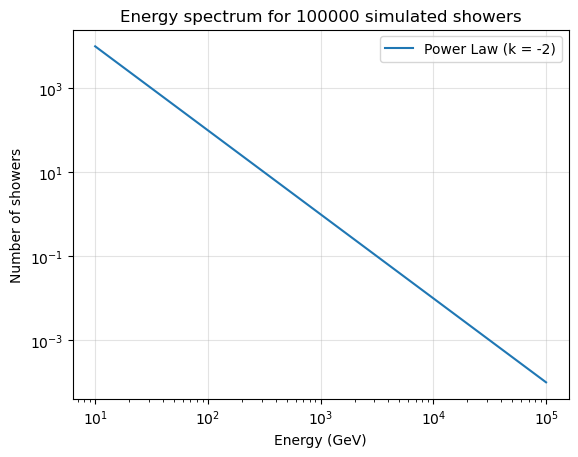

In [118]:
# Parameters
k = -2
x1 = 10
x2 = 100000
area_target = 100000

# Calculate the constant A
A = (area_target * (k + 1)) / ((x2)**(k+1) - (x1)**(k+1))

# Generate x values
x_vals = np.linspace(x1, x2, 200)

y_vals = (A * x_vals**k)

#y_vals = (A * x_vals**k) / (x_vals[4]-x_vals[3]) * x_vals
print(A)
# Plot the curve
plt.loglog(x_vals, y_vals, label=f'Power Law (k = {k})')
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of showers')
plt.title('Energy spectrum for 100000 simulated showers')
plt.legend()
plt.grid(alpha = 0.35)
plt.show()

array([1.88888058e+04, 1.53212927e+04, 1.24275729e+04, 1.00803875e+04,
       8.17651312e+03, 6.63222188e+03, 5.37959964e+03, 4.36355913e+03,
       3.53941734e+03, 2.87093053e+03, 2.32870026e+03, 1.88888058e+03,
       1.53212927e+03, 1.24275729e+03, 1.00803875e+03, 8.17651312e+02,
       6.63222188e+02, 5.37959964e+02, 4.36355913e+02, 3.53941734e+02,
       2.87093053e+02, 2.32870026e+02, 1.88888058e+02, 1.53212927e+02,
       1.24275729e+02, 1.00803875e+02, 8.17651312e+01, 6.63222188e+01,
       5.37959964e+01, 4.36355913e+01, 3.53941734e+01, 2.87093053e+01,
       2.32870026e+01, 1.88888058e+01, 1.53212927e+01, 1.24275729e+01,
       1.00803875e+01, 8.17651312e+00, 6.63222188e+00, 5.37959964e+00,
       4.36355913e+00, 3.53941734e+00, 2.87093053e+00, 2.32870026e+00])

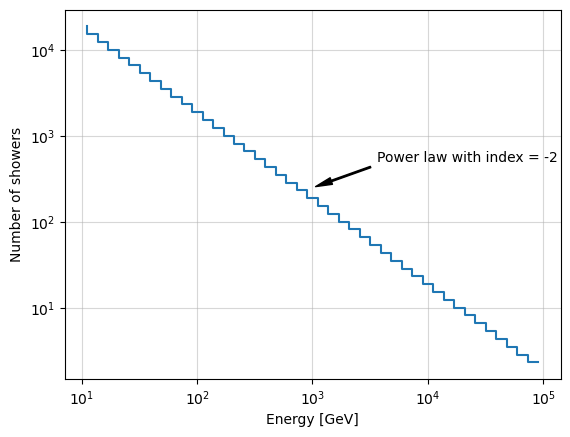

In [27]:
def number_events(E0, E1, k = -2, A = 1000100.01):
    return A * (E1**(k+1)-E0**(k+1))/(k+1)

energies = np.logspace(1,5,45)

events = number_events(energies[:-1], energies[1:])
plt.step(0.5*(energies[:-1] + energies[1:]), events)
plt.yscale('symlog')
plt.xscale('symlog')
plt.xlabel("Energy [GeV]")
plt.ylabel("Number of showers")
plt.grid(alpha = 0.5)
plt.annotate("Power law with index = -2", xy = (1000,250), xytext = (3600,500),arrowprops=dict(facecolor='black', shrink=0.05, width = 1, headwidth = 5))
events

In [23]:
energies_lin = np.linspace(10,100000, 44)

events_lin = number_events(energies_lin[:-1], energies_lin[1:])
energies_lin

array([1.00000000e+01, 2.33534884e+03, 4.66069767e+03, 6.98604651e+03,
       9.31139535e+03, 1.16367442e+04, 1.39620930e+04, 1.62874419e+04,
       1.86127907e+04, 2.09381395e+04, 2.32634884e+04, 2.55888372e+04,
       2.79141860e+04, 3.02395349e+04, 3.25648837e+04, 3.48902326e+04,
       3.72155814e+04, 3.95409302e+04, 4.18662791e+04, 4.41916279e+04,
       4.65169767e+04, 4.88423256e+04, 5.11676744e+04, 5.34930233e+04,
       5.58183721e+04, 5.81437209e+04, 6.04690698e+04, 6.27944186e+04,
       6.51197674e+04, 6.74451163e+04, 6.97704651e+04, 7.20958140e+04,
       7.44211628e+04, 7.67465116e+04, 7.90718605e+04, 8.13972093e+04,
       8.37225581e+04, 8.60479070e+04, 8.83732558e+04, 9.06986047e+04,
       9.30239535e+04, 9.53493023e+04, 9.76746512e+04, 1.00000000e+05])

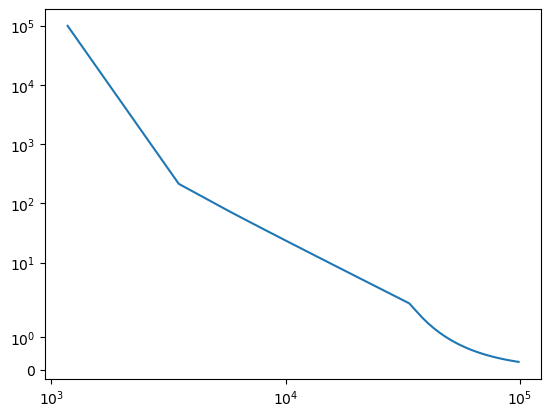

In [26]:
plt.plot(0.5*(energies_lin[:-1] + energies_lin[1:]), events_lin)
plt.yscale('symlog')
plt.xscale('symlog')

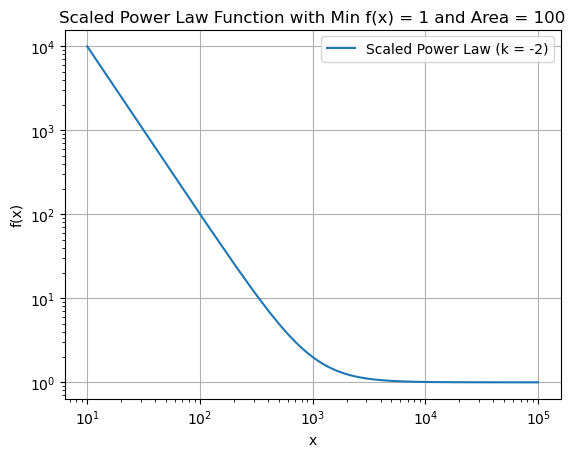

In [61]:
# Parameters
k = -2
x1 = 10
x2 = 100000
area_target = 100000

# Calculate the constant A
A = (area_target * (k + 1)) / (x2**(k + 1) - x1**(k + 1))

# Generate x values
x_vals = np.linspace(x1, x2, 1000)

# Calculate y values using the shifted and scaled power law function
y_vals = A * x_vals**k + 1

# Plot the curve
plt.loglog(x_vals, y_vals, label=f'Scaled Power Law (k = {k})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Scaled Power Law Function with Min f(x) = 1 and Area = 100')
plt.legend()
plt.grid()
plt.show()







In [274]:
def power_law(x, A):
    return A*x**-2

value = np.linspace(10,10000, 1000)

counts = power_

In [83]:
x_vals = np.logspace(1, 5, 200)

<Axes: ylabel='Count'>

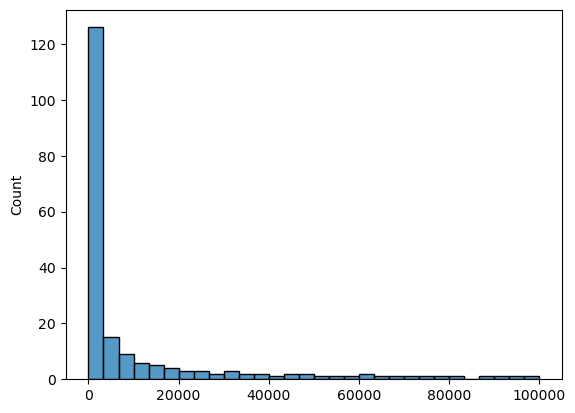

In [85]:
histplot(x_vals)

98489


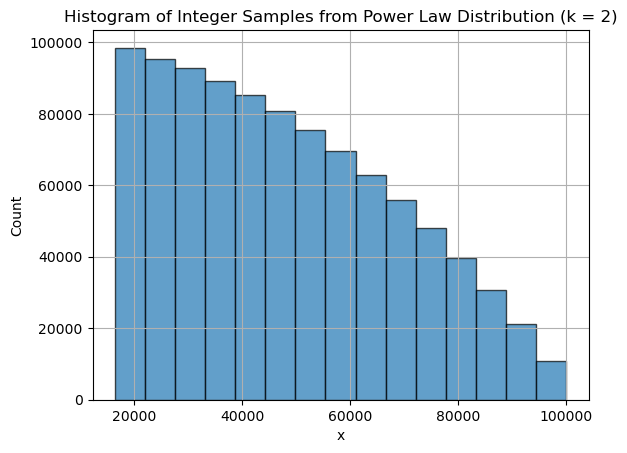

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = -2
num_points = 100000
x_min = 10
x_max = 100000

# Generate a set of unique integer values using a power law distribution
x_unique = np.geomspace(x_min, x_max, num_points)
x_unique = x_unique.astype(int)
x_unique = np.unique(x_unique)

# Calculate the corresponding counts for each unique value
count_total = np.sum(x_unique**(-k))
probabilities = (x_unique**(-k)) / count_total
num_samples_per_value = np.round(probabilities * num_points).astype(int)

# Generate the final distribution of integer points
x_samples = np.repeat(x_unique, num_samples_per_value)
print(len(x_samples))
# Create a histogram to visualize the distribution
plt.hist(x_samples, bins=15, edgecolor='black', alpha=0.7, cumulative = -1)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histogram of Integer Samples from Power Law Distribution (k = 2)')
plt.grid()
plt.show()


In [173]:
new_arr = np.flip(x_samples)
new_arr

array([100000, 100000, 100000, ...,  16447,  16446,  16444])

ConversionError: Failed to convert value(s) to axis units: 'x'

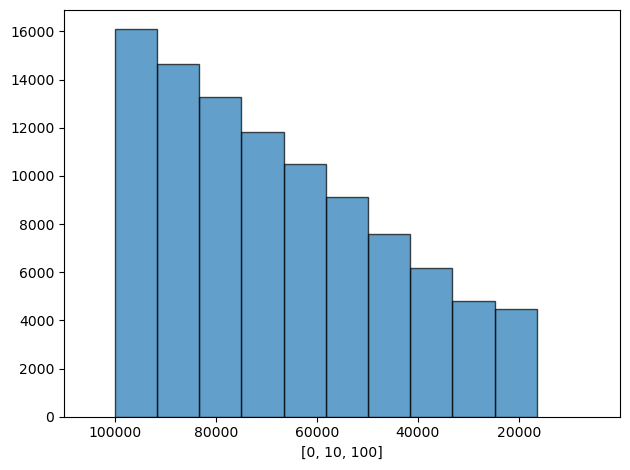

In [186]:
plt.figure()
plt.rcParams["figure.autolayout"] = True
ax = plt.subplot()
ax.hist(new_arr, bins=10, edgecolor='black', alpha=0.7)
plt.xlim(110000, 10)
plt.xlabel([0,10,100])
ax.set_xticks('x')
plt.ylabel('Count')
plt.title('Histogram of Integer Samples from Power Law Distribution (k = 2)')
plt.grid()
plt.show()

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = -2
num_points = 100000
x_min = 10
x_max = 100000

# Generate a set of unique integer values using a power law distribution
x_unique = np.geomspace(x_min, x_max, num_points)
x_unique = x_unique.astype(int)
x_unique = np.unique(x_unique)

# Calculate the logarithmic values
log_values = np.log(x_unique)
log_probabilities = (log_values - np.min(log_values)) / np.ptp(log_values)  # Normalize the log values

# Calculate the corresponding counts for each unique value
count_total = np.sum(log_probabilities)
num_samples_per_value = np.round(log_probabilities * num_points).astype(int)

# Generate the final distribution of integer points
x_samples = np.repeat(x_unique, num_samples_per_value)

# Create a histogram to visualize the distribution
plt.hist(x_samples, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Reversed Histogram of Integer Samples from Power Law Distribution (k = -2)')
plt.grid()
plt.show()


KeyboardInterrupt: 

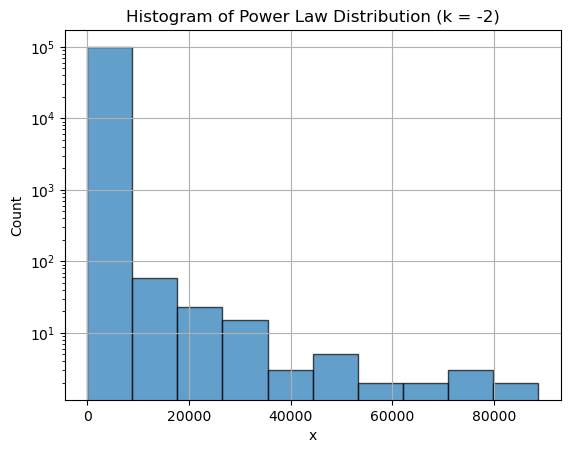

In [112]:
k = -2
num_samples = 100000
x_min = 10
x_max = 100000



U = np.random.rand(num_samples)
#U = np.random.logseries(0.6,num_samples)
x_samples = ((x_max**(k+1) - x_min**(k+1)) * U + x_min**(k+1))**(1/(k+1))

x_samples_int = np.round(x_samples).astype(int)

# Create a histogram
plt.hist(x_samples_int, bins=10, edgecolor='black', alpha=0.7, log = True)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histogram of Power Law Distribution (k = -2)')
plt.grid()
plt.show()

In [249]:
y = np.random.rand(100000)
n = -2
x0 = 10
x1 = 100000
x = ((x1**(n+1) - x0**(n+1))*y + x0**(n+1))**(1/(n+1))

<Axes: ylabel='Count'>

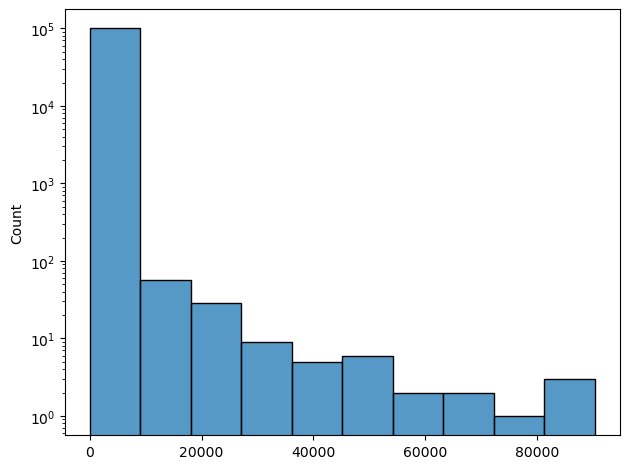

In [250]:
histplot(x, log=True, bins = 10)

7.172631380503169e-06

In [270]:
filename = f'/Users/vdk/Dummy100.simtel.gz'
F
event_iterator = iter(source)
#event = next(event_iterator)

In [271]:
for event in source:
    print(event)
    #print(event.count)

In [268]:
import eventio

with eventio.SimTelFile('/Users/vdk/Dummy100.simtel.gz') as f:
    print("len telescope ", len(f.telescope_descriptions))
    for array_event in f:
        print(array_event)
        print(array_event['mc_shower']['energy'])

len telescope  1


In [256]:
from eventio import EventIOFile
from eventio.simtel import MCEvent, MCShower


with EventIOFile('/Users/vdk/Dummy100.simtel.gz') as f:
    for eventio_object in f:
        if isinstance(eventio_object, MCShower):
            shower = eventio_object.parse()
            print('StereoReconstruction: {shower}, Energy={energy:.3f} TeV'.format(**shower))

        if isinstance(eventio_object, MCEvent):
            event = eventio_object.parse()
            print('   event: {event}, core_x={xcore:6.2f} m, core_y={ycore:6.2f} m'.format(**event))

StereoReconstruction: 1, Energy=0.000 TeV


KeyError: 'event'

In [187]:
# Plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# mathematics
from math import exp, pi, sqrt, log
from numpy import linspace, hstack, round, random, arange, mean, logspace, argmax, array
from collections import Counter
from random import sample, choice
from random import uniform
#from functools import reduce

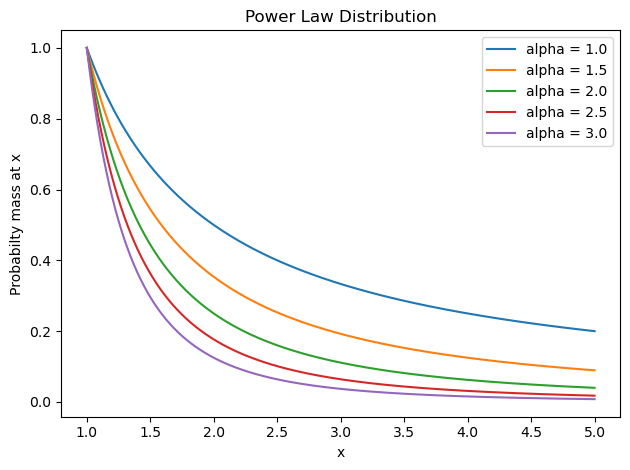

In [190]:
def power_law(x, alpha):
    '''
    x: iterable of x values
    alpha: parameter alpha
    '''
    return [point**(-alpha) for point in x]

# x values
x = linspace(1,5,10000)
alphas = linspace(1,3,5)
for alpha in alphas:
    plt.plot(x, power_law(x, alpha), '-', markersize = 1)
    plt.ylabel("Probabilty mass at x")
    plt.xlabel("x")
    plt.title("Power Law Distribution")
    plt.legend(["alpha = {}".format(round(a,2)) for a in alphas], loc = 1)

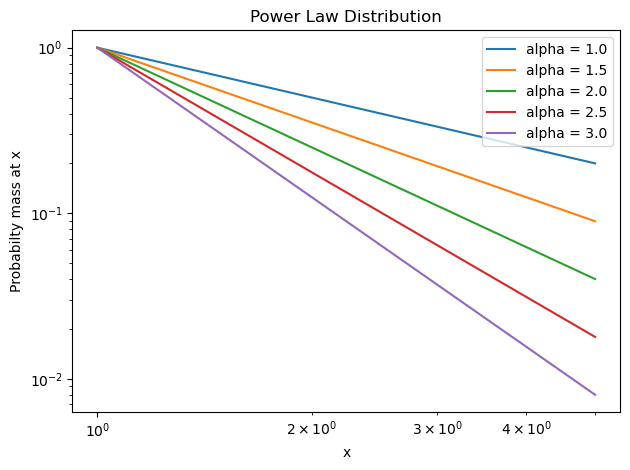

In [191]:
for alpha in alphas:
    plt.loglog(x, power_law(x, alpha), '-', markersize = 1)
    plt.ylabel("Probabilty mass at x")
    plt.xlabel("x")
    plt.title("Power Law Distribution")
    plt.legend(["alpha = {}".format(round(a,2)) for a in alphas], loc = 1)

In [207]:
# generate 100000 samples of a uniform distribution on 0,1
xmin = 1
r = random.uniform(0,1,10**5)
# generate the power law distributed samples
# set alpha
alpha = 2
power_law_samples = [xmin*(1-sample)**(-1/(alpha-1)) for sample in r]

In [193]:
def simple_histogram(samples, bin_sizes = None, num_bins = None):
    # sort the samples
    sorted_samples = sorted(samples)
    # grab the max for the bins
    max_val = max(samples)
    # min is 0, but not inclusive
    min_val = 0
    # either create bins by interval or by size
    if bin_sizes is not None:
        intervals = arange(min_val,max_val+bin_sizes,bin_sizes)
    if num_bins is not None:
        intervals = linspace(min_val,max_val,num_bins)
    # list of tuples defining the bins
    list_bins = list(zip(intervals,intervals[1:]))
    dict_bins = {x: 0 for x in list_bins}
    # put each sample into a bin
    i = 0
    for s in sorted_samples:
        if (s > list_bins[i][0]) and (s <= list_bins[i][1]):
            dict_bins[list_bins[i]] += 1
        else:
            while not ((s > list_bins[i][0]) and (s <= list_bins[i][1])):
                i += 1
            dict_bins[list_bins[i]] += 1
    return dict_bins

def plot_histogram(histogram):
    histogram_items = sorted(list(histogram.items()),key = lambda x:x[0])
    x_vals = [mean([x[0][0],x[0][1]]) for x in histogram_items]
    y_vals = [x[1] for x in histogram_items]
    return x_vals, y_vals

Text(0.5, 0, 'x')

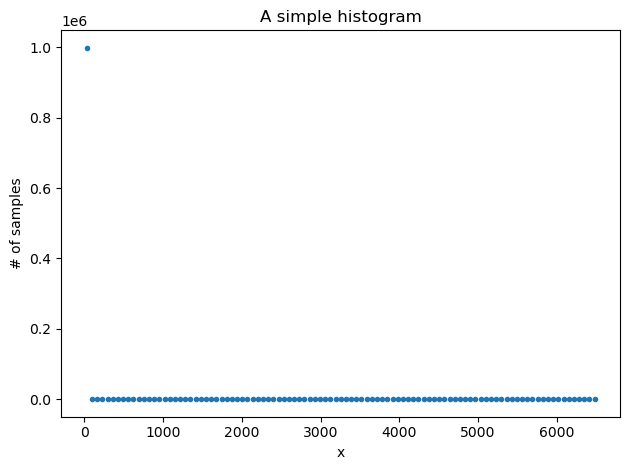

In [195]:
x,y = plot_histogram(simple_histogram(power_law_samples,num_bins = 100))
plt.plot(x,y,'.')
plt.title("A simple histogram")
plt.ylabel("# of samples")
plt.xlabel("x")

Text(0.5, 0, 'x')

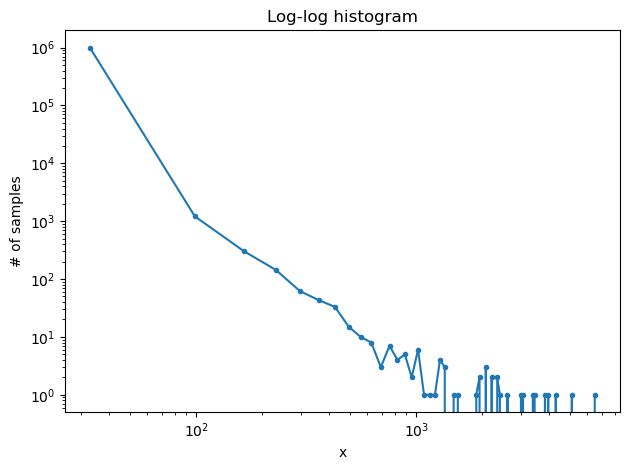

In [196]:
x,y = plot_histogram(simple_histogram(power_law_samples,num_bins = 100))
plt.loglog(x,y,'.-')
plt.title("Log-log histogram")
plt.ylabel("# of samples")
plt.xlabel("x")

In [205]:
def log_histogram(samples, num_bins = None):
    # sort the samples
    sorted_samples = sorted(samples)
    # grab the max for the bins
    max_val = max(samples)
    # min is 0, but not inclusive
    min_val = 0
    # create logarithmically spaced bins
    intervals = logspace(min_val,log(max_val+10,10),num_bins,base = 10)
    #return intervals
    # list of tuples defining the bins
    list_bins = list(zip(intervals,intervals[1:]))
    dict_bins = {x: 0 for x in list_bins}
    # put each sample into a bin
    i = 0
    for s in sorted_samples:
        if (s > list_bins[i][0]) and (s <= list_bins[i][1]):
            dict_bins[list_bins[i]] += 1
        else:
            while not ((s > list_bins[i][0]) and (s <= list_bins[i][1])):
                i += 1
            dict_bins[list_bins[i]] += 1
    return dict_bins

def plot_log_histogram(histogram):
    histogram_items = sorted(list(histogram.items()),key = lambda x:x[0][0])
    x_vals = [10**mean([log(x[0][0],10),log(x[0][1],10)]) for x in histogram_items]
    y_vals = [x[1]/(x[0][1] - x[0][0]) for x in histogram_items]
    return x_vals, y_vals

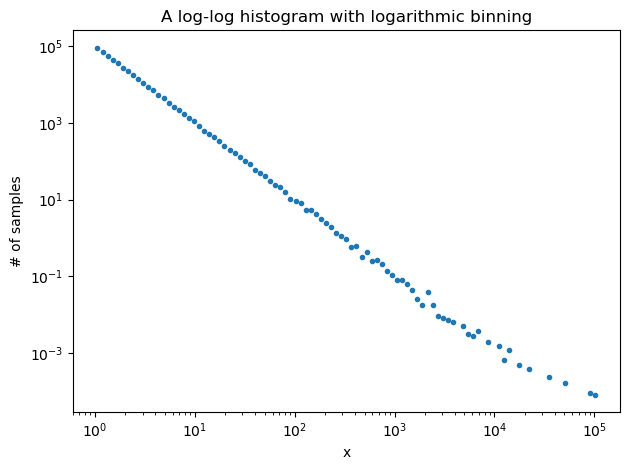

In [208]:
x,y = plot_log_histogram(log_histogram(power_law_samples,num_bins = 100))
_ = plt.loglog(x,y,'.')
_ = plt.title("A log-log histogram with logarithmic binning")
_ = plt.ylabel("# of samples")
_ = plt.xlabel("x")

In [199]:
def cumulative_dist(samples,bin_sizes = None, num_bins = None):
    # count the number of samples with a value greater than X
    # sort the samples
    sorted_samples = array(sorted(samples))
    # grab the max for the bins
    max_val = max(samples)
    # min is 0, but not inclusive
    min_val = 0
    # either create bins by interval or by size
    if bin_sizes is not None:
        intervals = arange(min_val,max_val+bin_sizes,bin_sizes)
    if num_bins is not None:
        intervals = linspace(min_val,max_val,num_bins)
    # put each sample into a bin
    cum_dist = []
    for i in intervals:
        cum_dist.append(len(sorted_samples) - argmax(sorted_samples > i))
    return intervals, cum_dist

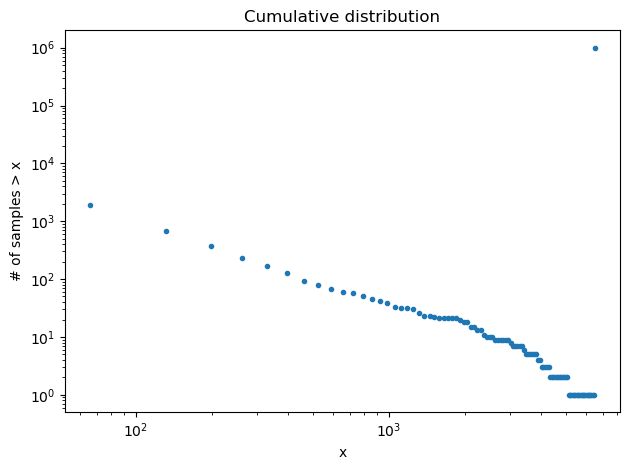

In [200]:
x,y = cumulative_dist(power_law_samples,num_bins = 100)
_ = plt.loglog(x,y,'.')
_ = plt.title("Cumulative distribution")
_ = plt.ylabel("# of samples > x")
_ = plt.xlabel("x")

In [1]:
1+2

3

In [6]:
a = 51840
b = 9e-7
arr = [a,b]

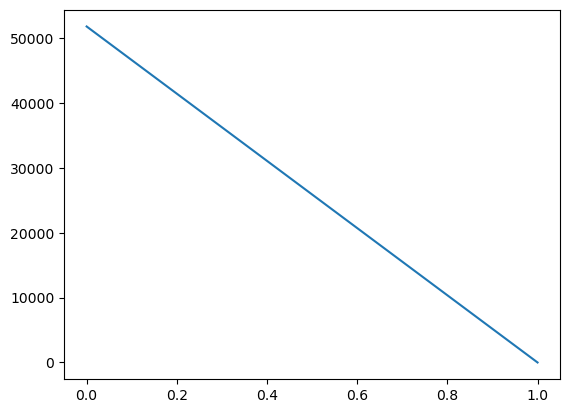

In [9]:
plt.plot(arr)

In [10]:
-2.7+1

-1.7000000000000002

In [11]:
0.4*1.8

0.7200000000000001

In [13]:
(100000**2)*4

40000000000

In [15]:
400 * 1000 * 100

40000000

In [17]:
400 * 100

40000

In [18]:
69.967-68.44

1.527000000000001